In [1]:
import function_list #,viz_functions
import os
base_path,data_path,output = function_list.folder_setup()

In [2]:
os.chdir(data_path)
beds = pd.read_csv('bed_size.csv')
os.chdir(output)

In [3]:
#sort descending by Area
beds = beds.sort_values(by='Area',ascending=False).reset_index(drop=True)

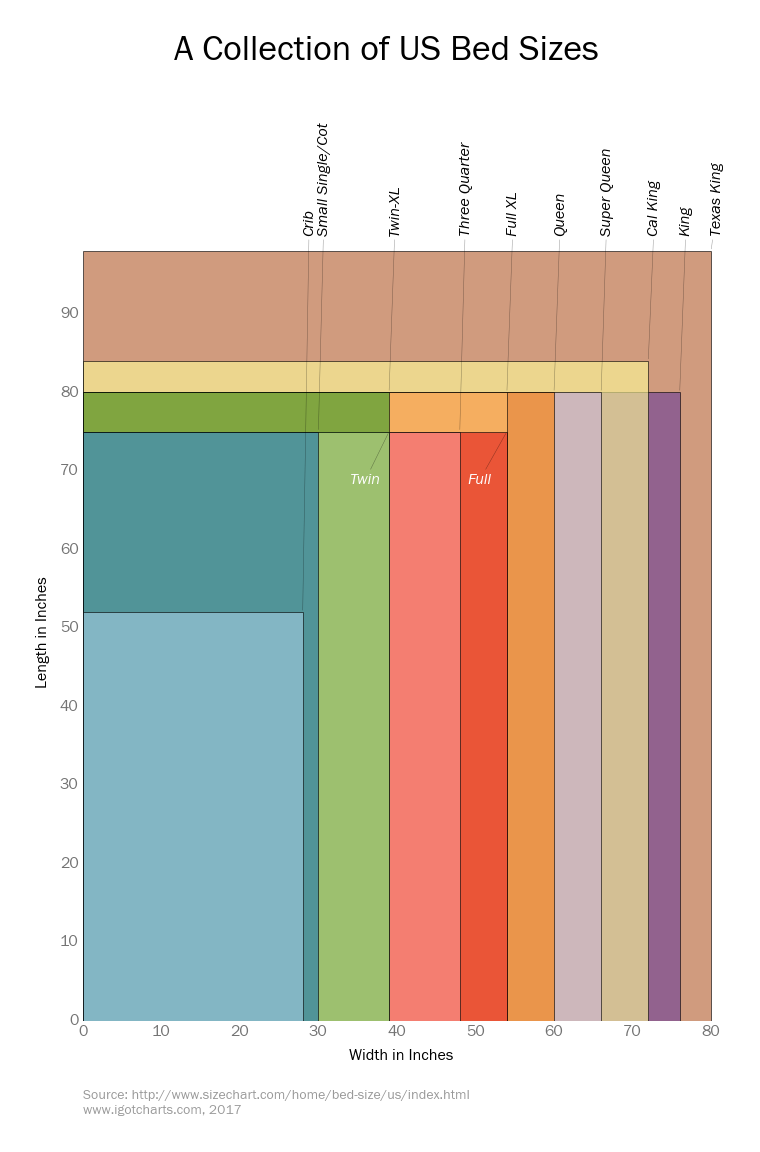

In [7]:
#Create chart

fig = figure(figsize=(16,16))

fig.suptitle('A Collection of US Bed Sizes',fontsize=36)

ax = fig.add_subplot(111,aspect='equal')

plt.subplots_adjust(top=.8)

#plot rectangles

for item in range(len(beds)):
    ax.add_patch(patches.Rectangle((0,0),
               width=beds['Width'][item],edgecolor='black',
               height=beds['Length'][item],alpha=.6,facecolor=beds['Color'][item],zorder=beds.index[item]))

#Annotate features
bed_1 = [0,1,2,3,4,5,7,8,10,11]
bed_2 = [6,9]

for item in bed_1: #Due to overlap, need to breakout features
    ax.annotate(beds['Bed'][item],xy=(beds['Width'][item],beds['Length'][item]),
            xytext=(beds['Width'][item],100),arrowprops=dict(arrowstyle='-',
                            connectionstyle='arc3',alpha=.4,linewidth=.5),
                ha='left',va='bottom',rotation=90,style='italic',zorder=10,fontsize=16)
    
for item in (6,9):    
    ax.annotate(beds['Bed'][item],xy=(beds['Width'][item],beds['Length'][item]),fontsize=16,
                arrowprops=dict(arrowstyle="-",connectionstyle="arc3",alpha=.4,linewidth=.5),
    xytext=(beds['Width'][item]-5,68),
                ha='left',va='bottom',rotation=0,style='italic',color='White',zorder=14)
    
#set the x and y axis limits
    
ax.set_xlim(0,beds['Width'].max()+1)
ax.set_ylim(0,beds['Length'].max()+1)

#set the tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

#label axes
ax.set_xlabel('Width in Inches',fontsize=16)
ax.set_ylabel('Length in Inches',fontsize=16)

#format tick labels
ax.tick_params(axis='both', which='major', labelsize=16,labelcolor='#737373')

#remove grid
ax.grid(False)

ax.text(0,-.1,'Source: '+list(beds.columns.values)[-1],transform=ax.transAxes,fontsize=14,alpha=.4)

ax.text(0,-.12,'www.igotcharts.com, 2017',transform=ax.transAxes,fontsize=14,alpha=.4)

os.chdir(output)
plt.savefig('Bed_Size',bbox_inches = 'tight', dpi = 300, pad_inches = .5,edgecolor = '#ffffff',facecolor = '#ffffff')